In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [5]:
iris = load_iris()

print("Key Values: \n", list(iris.keys()))
print("Feature names: \n", list(iris.feature_names))
print("Target names: \n", iris.target_names)

Key Values: 
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
Feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: 
 ['setosa' 'versicolor' 'virginica']


In [6]:
X = iris["data"][:,(2,3)]

y = (iris["target"] == 2).astype(np.int)

print(X.shape)
print(y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(150, 2)
(150,)

X data type:  float64
y data type:  int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("X Train: ", X_train.shape)

X Train:  (120, 2)


In [8]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
%%time

param_grid = {'solver': ['liblinear', 'newton-cg', 'lbfgs'], 
                  'tol':[1e-3, 1e-4], 'max_iter':[100, 500, 1000], 'C':[0.1, 0.5, 1, 1.5, 2, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (F1 score): %f", lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    3.7s finished


Best Score (F1 score): %f 0.9654320987654321
Optimal Hyperparameter Values:  {'C': 0.5, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.001}
CPU times: user 1.79 s, sys: 152 ms, total: 1.94 s
Wall time: 4.99 s


In [10]:
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=0.5, solver='liblinear', tol=0.001)

In [11]:
print("No or Iterations: ", lg_reg_clf.n_iter_)
print("Weight Intercept: ", lg_reg_clf.intercept_)
print("Weight Coefficients: ", lg_reg_clf.coef_)

No or Iterations:  [5]
Weight Intercept:  [-1.64731535]
Weight Coefficients:  [[1.31873043 1.99610042]]


In [12]:
y_train_predicted = lg_reg_clf.predict(X_train)

accuracy_score_train = np.mean(y_train_predicted == y_train)
print("Train accuracy: ", accuracy_score_train)

print("Train Confussion Matrix: ")
print(confusion_matrix(y_train, y_train_predicted))


y_test_predicted = lg_reg_clf.predict(X_test)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\n\nTest accuracy: ", accuracy_score_test)

print("Test Confussion Matrix: ")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted)
print("Test Precision = %f "%precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f " %recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report: ")
print(classification_report(y_test, y_test_predicted))

Train accuracy:  0.9666666666666667
Train Confussion Matrix: 
[[76  2]
 [ 2 40]]


Test accuracy:  0.9666666666666667
Test Confussion Matrix: 
[[21  1]
 [ 0  8]]
Test Precision = 0.888889 
Test Recall = 1.000000 
Test F1 Score = 0.941176

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [13]:
def decision_boundary_equation_based(clf, X):

    xmin, xmax = X.min()-1, X.max()+1

    w = clf.coef_[0]
    b = clf.intercept_[0]

    x1 = np.linspace(xmin, xmax, 100)
    decision_boundary = -(b +w[0]*x1)/w[1]
    plt.plot(x1, decision_boundary,"k--", lw=3)

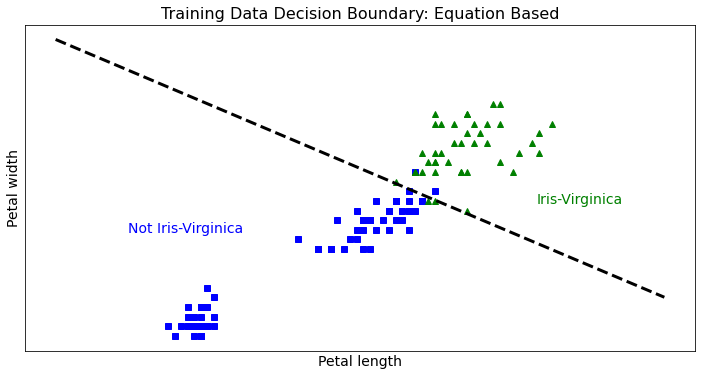

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X_train[y_train==0,0], X_train[y_train==0,1],'bs')
ax.plot(X_train[y_train==1,0], X_train[y_train==1,1],'g^')


decision_boundary_equation_based(lg_reg_clf, X_train)

ax.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
ax.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.set_title("Training Data Decision Boundary: Equation Based", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

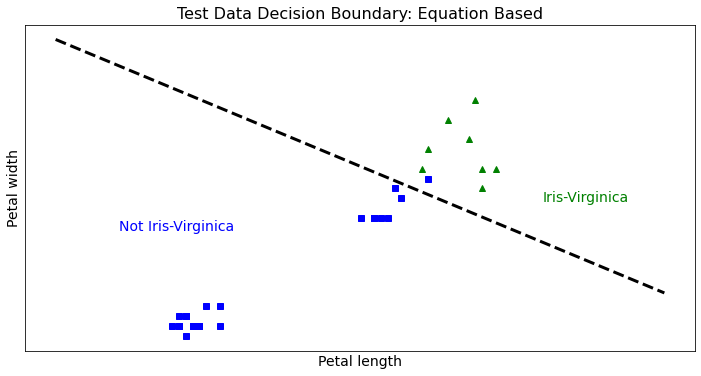

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X_test[y_test==0,0], X_test[y_test==0,1],'bs')
ax.plot(X_test[y_test==1,0], X_test[y_test==1,1],'g^')


decision_boundary_equation_based(lg_reg_clf, X_test)

ax.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
ax.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.set_title("Test Data Decision Boundary: Equation Based", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
def decision_boundary_various_thresholds(clf, X):

    x1min, x1max = X[:,0].min()-1 , X[:,0].max()+1
    x2min, x2max = X[:,1].min()-1 , X[:,1].max()+1

    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_proba = clf.predict_proba(X_new)

    zz = y_proba[:,1].reshape(x1.shape)
    
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)

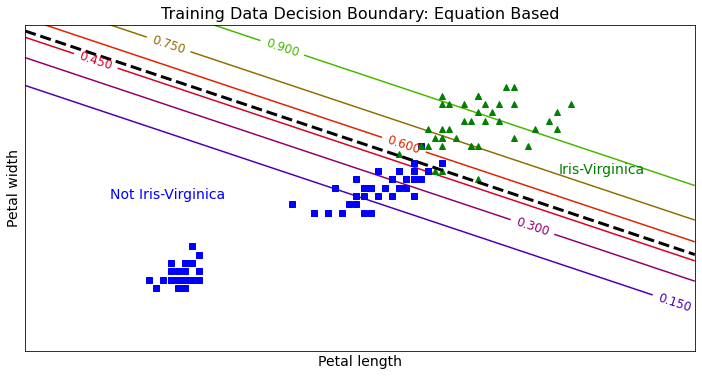

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X_train[y_train==0,0], X_train[y_train==0,1],'bs')
ax.plot(X_train[y_train==1,0], X_train[y_train==1,1],'g^')


decision_boundary_equation_based(lg_reg_clf, X_train)
decision_boundary_various_thresholds(lg_reg_clf, X_train)

ax.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
ax.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.set_title("Training Data Decision Boundary: Equation Based", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
def decision_boundary_various_thresholds(clf, X):

    x1min, x1max = X[:,0].min()-1 , X[:,0].max()+1
    x2min, x2max = X[:,1].min()-1 , X[:,1].max()+1

    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.summer, alpha=0.9)

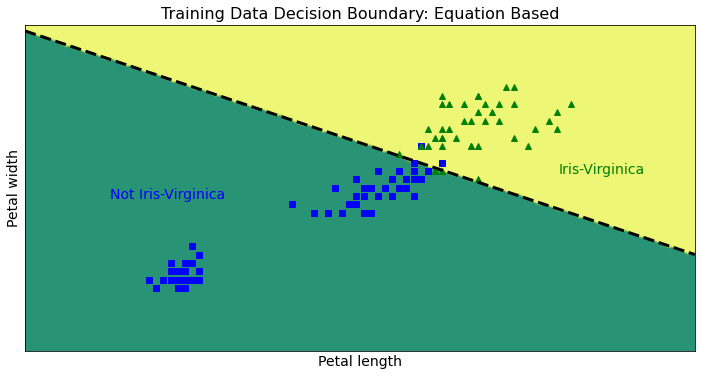

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(X_train[y_train==0,0], X_train[y_train==0,1],'bs')
ax.plot(X_train[y_train==1,0], X_train[y_train==1,1],'g^')


decision_boundary_equation_based(lg_reg_clf, X_train)
decision_boundary_various_thresholds(lg_reg_clf, X_train)

ax.text(-1.5, -0.1, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
ax.text(2.0, 0.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.set_title("Training Data Decision Boundary: Equation Based", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()